# Data Inspection & Preprocessing

In [406]:
# Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("../data/raw/mlb_data.csv")
df.head()

,"last_name, first_name",player_id,year,k_percent,bb_percent,woba,xwoba,z_swing_percent,oz_swing_percent,oz_contact_percent,iz_contact_percent,swing_percent
0,"Cabrera, Miguel",408234,2021,22.4,7.6,0.305,0.313,69.1,30.2,57.1,82.0,49.4
1,"Cruz, Nelson",443558,2021,21.6,8.7,0.346,0.367,73.8,31.0,52.6,77.3,51.0
2,"Peralta, David",444482,2021,17.1,8.6,0.314,0.294,66.3,27.4,59.9,86.8,46.5
3,"Blackmon, Charlie",453568,2021,15.6,9.3,0.333,0.358,67.9,26.2,63.9,85.8,47.3
4,"McCutchen, Andrew",457705,2021,23.0,14.1,0.335,0.340,63.7,19.1,50.5,81.1,41.7


The Major League Baseball dataset represents player plate approach and outcome performance statistics, structured so that each row is defined as a player-season observation, with a unique pairing of a player and season year.

In [407]:
# Data shape and types
print(df.shape)
df.info()

(669, 12)
<class 'pandas.DataFrame'>
RangeIndex: 669 entries, 0 to 668
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   last_name, first_name  669 non-null    str    
 1   player_id              669 non-null    int64  
 2   year                   669 non-null    int64  
 3   k_percent              669 non-null    float64
 4   bb_percent             669 non-null    float64
 5   woba                   669 non-null    float64
 6   xwoba                  669 non-null    float64
 7   z_swing_percent        669 non-null    float64
 8   oz_swing_percent       669 non-null    float64
 9   oz_contact_percent     669 non-null    float64
 10  iz_contact_percent     669 non-null    float64
 11  swing_percent          669 non-null    float64
dtypes: float64(9), int64(2), str(1)
memory usage: 62.8 KB


The dataset holds 669 observations, each containing 12 attributes. Only the nine significant data points, represented as floats, will be examined in the forthcoming analysis.

In [408]:
# Missing Values
df.isna().sum()

last_name, first_name    0
player_id                0
year                     0
k_percent                0
bb_percent               0
woba                     0
xwoba                    0
z_swing_percent          0
oz_swing_percent         0
oz_contact_percent       0
iz_contact_percent       0
swing_percent            0
dtype: int64

In [409]:
# Duplicates
df.duplicated().sum()

np.int64(0)

There are no missing values or duplicated rows in the dataset, meaning that no amendments will need to be made to it.

In [410]:
# Basic summary statistics
df.iloc[:,3:].describe()

,k_percent,bb_percent,woba,xwoba,z_swing_percent,oz_swing_percent,oz_contact_percent,iz_contact_percent,swing_percent
count,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000
mean,20.597010,8.901046,0.333913,0.335398,67.735277,28.061883,58.447683,83.546039,47.503438
std,5.397645,2.912972,0.031473,0.032173,5.704530,5.770397,9.215808,4.968837,4.705122
min,3.100000,2.500000,0.245000,0.265000,52.800000,12.200000,35.500000,69.400000,35.000000
25%,16.700000,6.800000,0.314000,0.315000,63.800000,23.900000,51.600000,80.100000,44.300000
50%,20.500000,8.800000,0.332000,0.332000,67.500000,27.500000,58.600000,83.600000,47.400000
75%,24.500000,10.700000,0.351000,0.352000,71.500000,31.600000,63.900000,86.900000,50.400000
max,34.600000,22.200000,0.476000,0.480000,83.600000,47.500000,92.300000,96.100000,62.300000


The central tendency and dispersion metrics of the dataset appear normal, with no glaring errors in its distribution range and shape. The following univariate analysis will visualize these features and provide an understanding of how they can answer the previously proposed discovery questions.

# Univariate Analysis

## Swing%

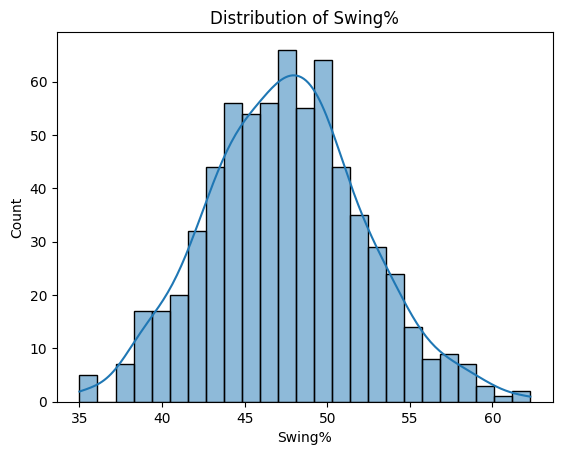

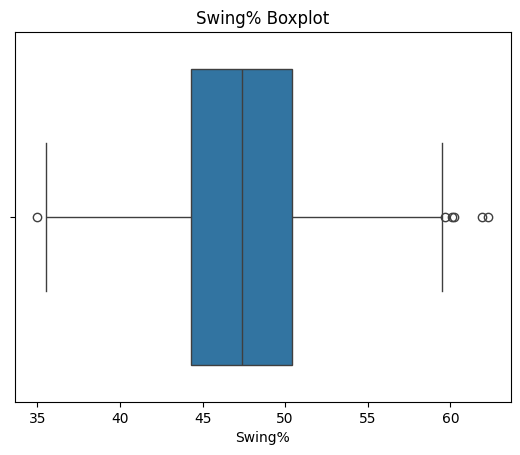

In [411]:
# Build and show histogram
sns.histplot(df["swing_percent"], bins = 25, kde = True)
plt.title("Distribution of Swing%")
plt.xlabel("Swing%")
plt.show()

# Build and show boxplot
sns.boxplot(x = df["swing_percent"])
plt.xlabel("Swing%")
plt.title("Swing% Boxplot")
plt.show()

Swing% displays a symmetric, unimodal distribution on a standard percentage scale, with a tightly packed center around the mean but higher variability in its tails. There is a noticeable number of outliers on the higher end of the spectrum compared to the lower end, indicating that there are more players prone to intense swinging and aggression rather than extreme passivity or patience. The presence of this upper-tail variation may indicate that Swing% can contribute to distinguishing between aggressive and selective players, and its outliers can signal players on the extreme end of either spectrum.

## Z-Swing%

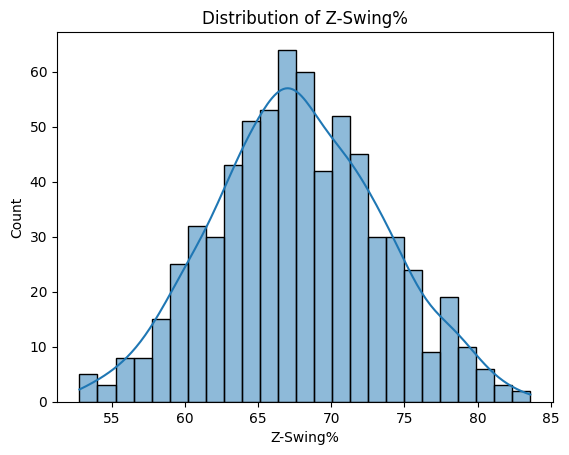

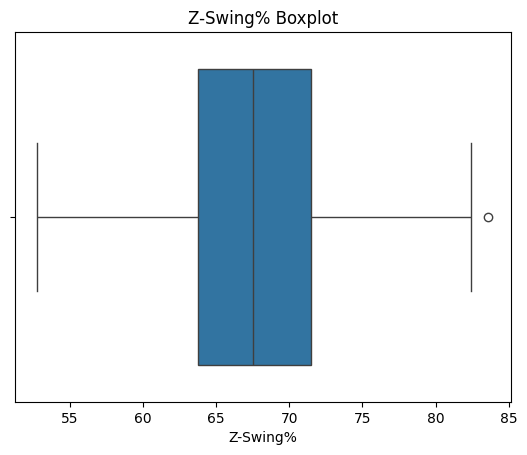

In [412]:
# Build and show histogram
sns.histplot(df["z_swing_percent"], bins = 25, kde = True)
plt.title("Distribution of Z-Swing%")
plt.xlabel("Z-Swing%")
plt.show()

# Build and show boxplot
sns.boxplot(x = df["z_swing_percent"])
plt.xlabel("Z-Swing%")
plt.title("Z-Swing% Boxplot")
plt.show()


The distribution exhibited by Z-Swing% on a traditional percentage scale is roughly unimodal, displaying a slightly greater variability than overall Swing%. Most players cluster around the mean, indicating a shared tendency in how hitters approach in-zone pitch selection, with only one notable outlier. While there is a clear central concentration, the spread implies meaningful differences across players regarding in-zone aggression, which can help refine batter profiles in terms of their general plate approach strategy on pitches in the strike zone.

## O-Swing%

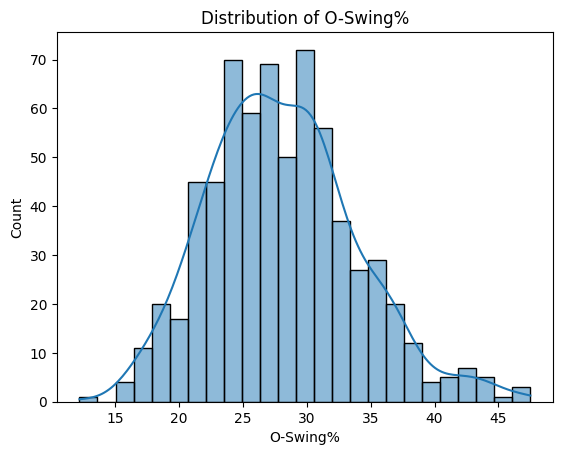

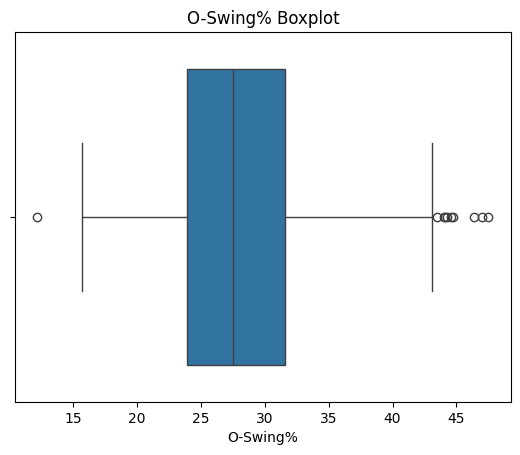

In [413]:
# Build and show histogram
sns.histplot(df["oz_swing_percent"], bins = 25, kde = True)
plt.title("Distribution of O-Swing%")
plt.xlabel("O-Swing%")
plt.show()

# Build and show boxplot
sns.boxplot(x = df["oz_swing_percent"])
plt.xlabel("O-Swing%")
plt.title("O-Swing% Boxplot")
plt.show()

Compared to Z-Swing%, O-Swing% demonstrates less widespread variability, but a prominent right skew, which forms a longer upper tail in its unimodal distribution across a percentage scale. Most players roughly cluster around a central range; however, of those who fall outside this range, a noticeable subset displays elevated chase rates, reflected by several high-end outliers. This development signifies that extreme out-of-zone aggressiveness is more common than the opposite, making O-Swing% a strong feature for identifying aggressive hitter profiles as well as more disciplined batters.

## Z-Contact%

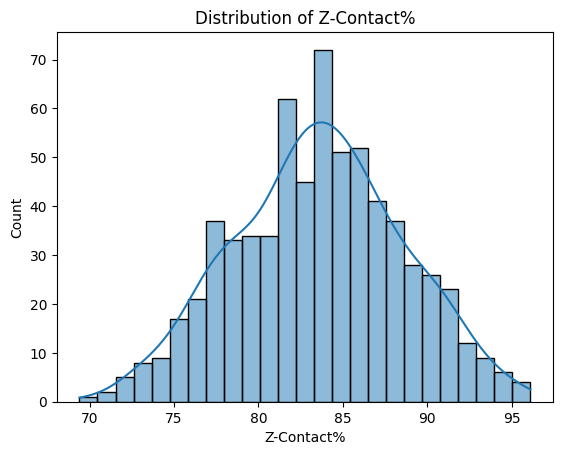

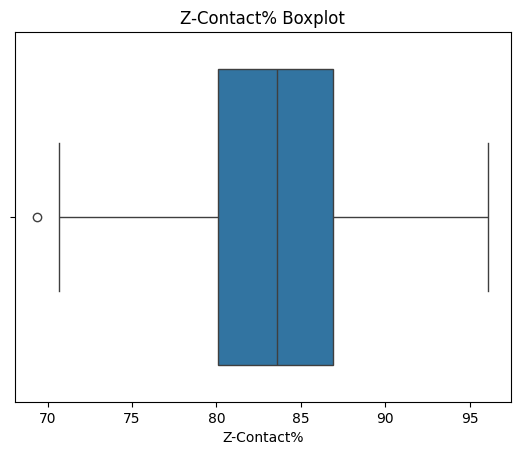

In [414]:
# Build and show histogram
sns.histplot(df["iz_contact_percent"], bins = 25, kde = True)
plt.title("Distribution of Z-Contact%")
plt.xlabel("Z-Contact%")
plt.show()

# Build and show boxplot
sns.boxplot(x = df["iz_contact_percent"])
plt.xlabel("Z-Contact%")
plt.title("Z-Contact% Boxplot")
plt.show()

Z-Contact% holds a moderate amount of variability in its unimodal percentage distribution, additionally forming a slight left skew. Batters generally lie in a central range, but their dispersion is much more varied, revealing differences in bat-to-ball skill on in-zone pitches. The left skew suggests that higher contact rates are more frequent than lower ones. This distribution indicates that Z-Contact% is an important attribute for identifying whether a hitter makes consistent contact, which puts up more of a fight within the strike zone. This aptitude gives them a higher chance of getting on base, factoring into their batter profile.

## O-Contact%

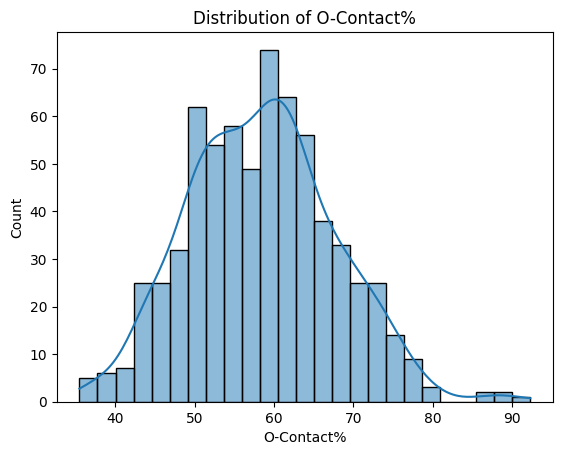

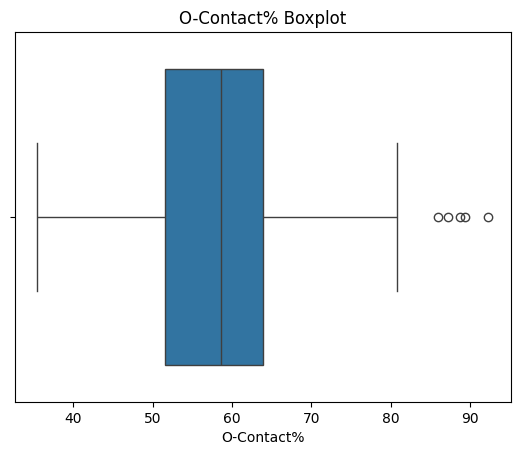

In [415]:
# Build and show histogram
sns.histplot(df["oz_contact_percent"], bins = 25, kde = True)
plt.title("Distribution of O-Contact%")
plt.xlabel("O-Contact%")
plt.show()

# Build and show boxplot
sns.boxplot(x = df["oz_contact_percent"])
plt.xlabel("O-Contact%")
plt.title("O-Contact% Boxplot")
plt.show()

O-Contact% holds greater variability than Z-Contact%, and forms a right skew in its unimodal distribution. Batters are more widely spread across the center grouping, encompassing a larger range in percentages with considerable differences in contact ability on pitches outside the strike zone. The right skew of outliers represents players who produce well-above-average contact on out-of-zone pitches. This means that O-Contact% may be a vital statistic in identifying an assortment of hitters, such as those with outstanding bat-to-ball skill outside of the strike zone, those who make poor swinging decisions outside of the strike zone, and those who fall somewhere in the vast middle.

## wOBA

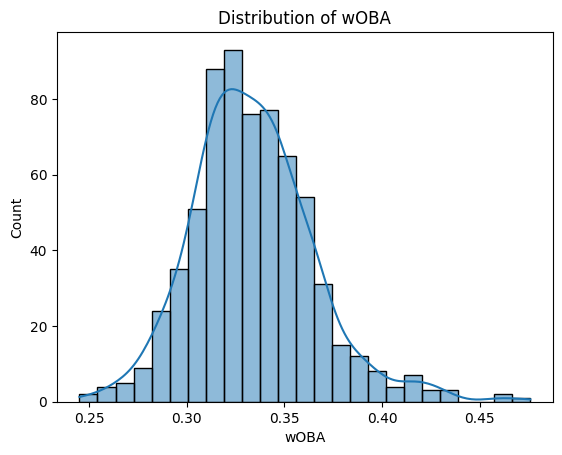

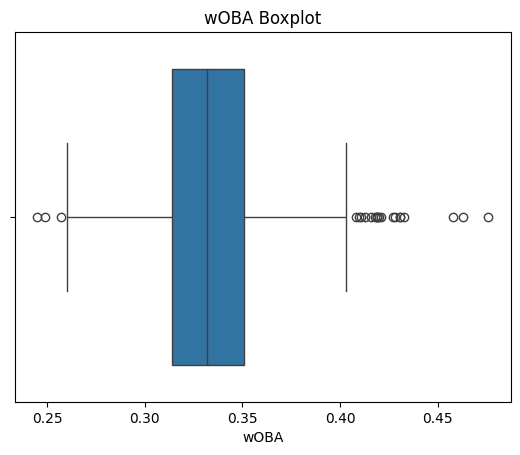

In [416]:
# Build and show histogram
sns.histplot(df["woba"], bins = 25, kde = True)
plt.title("Distribution of wOBA")
plt.xlabel("wOBA")
plt.show()

# Build and show boxplot
sns.boxplot(x = df["woba"])
plt.xlabel("wOBA")
plt.title("wOBA Boxplot")
plt.show()

The unimodal, decimal distribution for wOBA (weighted on-base average) is tightly packed with sparse variability in offensive outcome metrics for most hitters, but also contains a high number of outliers on both ends, especially in the upper-tail, resulting in a right skew. This dispersion indicates that while the majority of the league have very similar performance results, more players perform exceptionally than those who perform extremely poorly. As a result, wOBA may serve to gauge the performances of formed batter profile pools to discover their typical observed outcomes while also identifying over- and underperformers in each respective category. While not used as an input for the actual clustering process itself, wOBA will analyze each found cluster and draw conclusions from them concerning their observed effectiveness.

## xwOBA

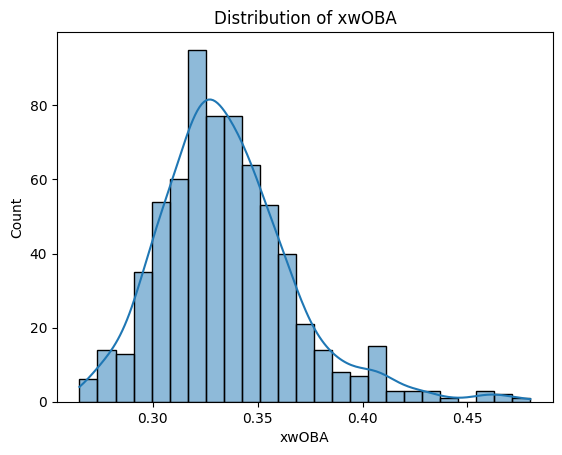

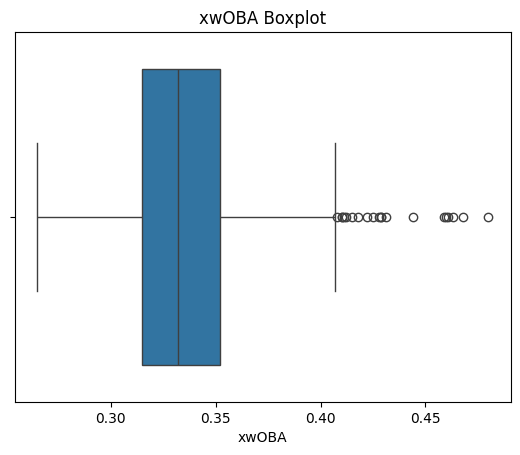

In [417]:
# Build and show histogram
sns.histplot(df["xwoba"], bins = 25, kde = True)
plt.title("Distribution of xwOBA")
plt.xlabel("xwOBA")
plt.show()

# Build and show boxplot
sns.boxplot(x = df["xwoba"])
plt.xlabel("xwOBA")
plt.title("xwOBA Boxplot")
plt.show()


As anticipated, xwOBA (expected weighted on-base average) is very similar to wOBA when comparing their decimal distributions. However, while slightly more central packed, xwOBA also introduces more high-end outliers and no low-end outliers in contrast. This suggests that there is an evident number of players who exceed their observed outcome results due to the positive shift that xwOBA's distribution takes on. Like wOBA, xwOBA will be employed to analyze batter profiles after they are formed, examining how each one is expected to perform offensively, evaluating and contrasting their overall theoretical effectiveness.

## BB%

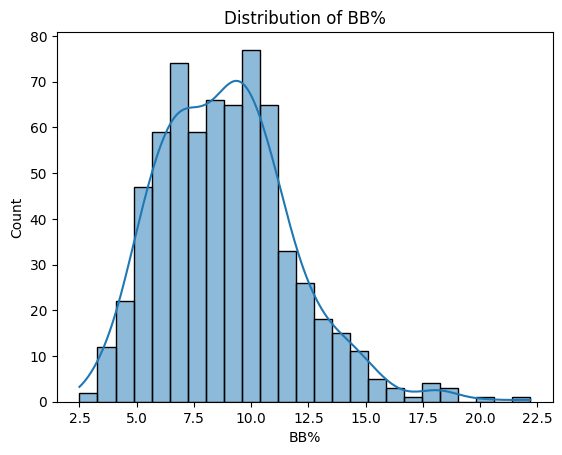

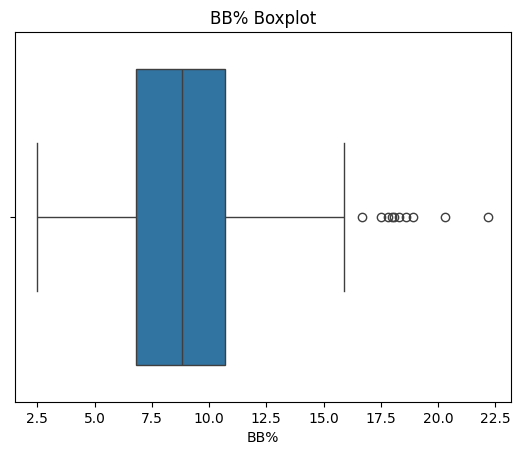

In [418]:
# Build and show histogram
sns.histplot(df["bb_percent"], bins = 25, kde = True)
plt.title("Distribution of BB%")
plt.xlabel("BB%")
plt.show()

# Build and show boxplot
sns.boxplot(x = df["bb_percent"])
plt.xlabel("BB%")
plt.title("BB% Boxplot")
plt.show()

BB% (base-on-balls percentage) follows a unimodal percentage distribution with a predominant right skew and multiple outliers. This indicates that most players fall under a central range, with a select few elite batters who excel at drawing walks. This attribute can be used for evaluating a player's plate discipline for getting on base, with higher values generally exhibiting more patience and lower ones more aggression, contributing to plate approach profiling.

## K%

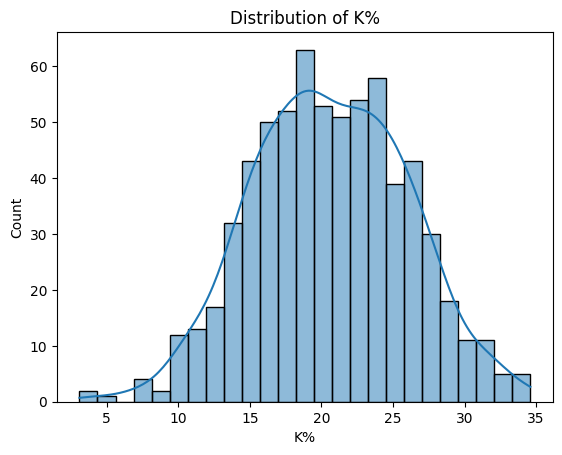

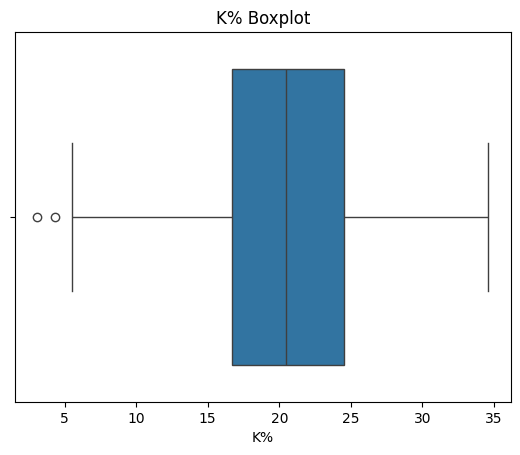

In [419]:
# Build and show histogram
sns.histplot(df["k_percent"], bins = 25, kde = True)
plt.title("Distribution of K%")
plt.xlabel("K%")
plt.show()

# Build and show boxplot
sns.boxplot(x = df["k_percent"])
plt.xlabel("K%")
plt.title("K% Boxplot")
plt.show()

K% (strikeout percentage) holds a standard unimodal distribution on a percentage scale with no skew on either end, although it does encompass a large range of metrics. The appearance of two low-end outliers means that there are not many players who greatly excel in this area. K% can be utilized similarly to BB% by measuring batter discipline and strategy for getting on base. Because of the larger scope and variation K% distinguishes, it will be clearer to cluster players based on this statistic, as it provides more potential groupings and categories.

## Impact

Each plate-approach metric studied presents unique ways to profile batters, find their observed and expected performance outputs, and identify which of them are outliers who over- or underachieve compared to their respective cluster group. Bivariate and multivariate analysis will now find which of these attributes correlate and connect the most, preparing for clustering and providing insights into how the groupings will be constructed.

# Bivariate & Multivariate Analysis

## Correlation Heatmap

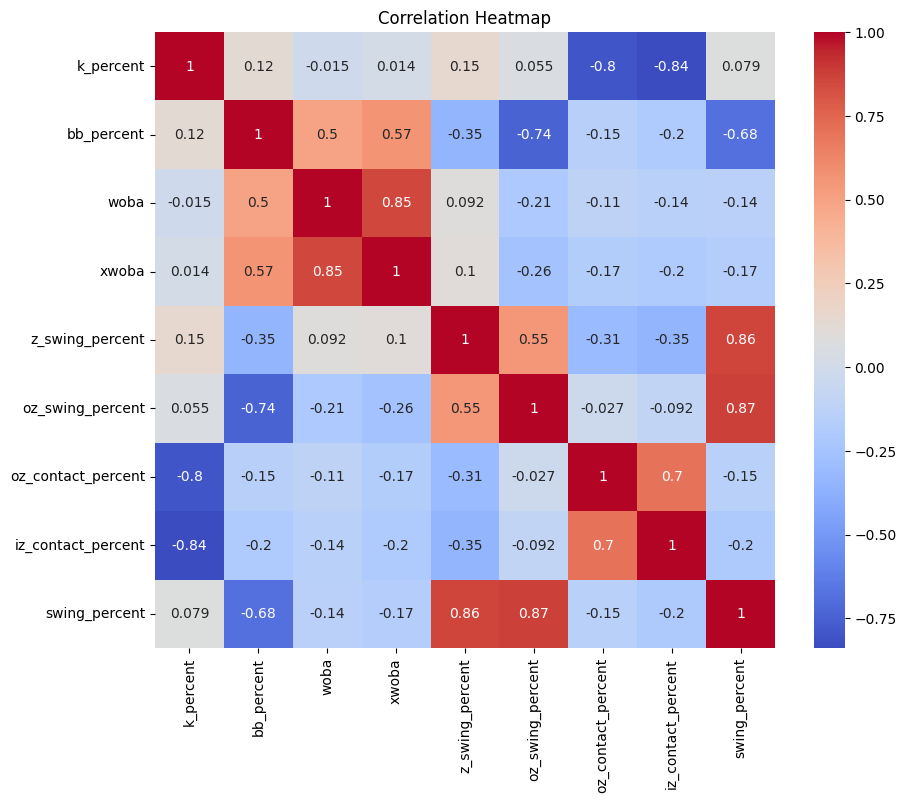

In [420]:
# Build and show correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.iloc[:, 3:].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

The correlation heatmap reflects a variety of relationships, including inverse ones. There are more of these types of relationships, meaning that direct relationships are not as prevalent in the data and do not contribute much to individual player profiles outside a few obvious correlations. The relationships that will most heavily guide feature selection will be examined with scatterplots.

## Scatterplots

Text(0.5, 1.0, 'O-Swing% vs. Swing% Correlation')

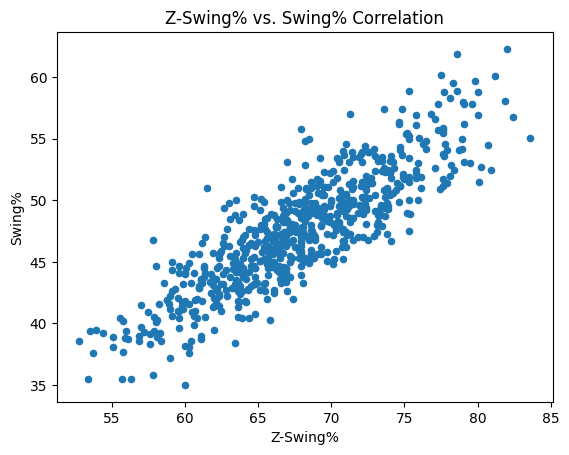

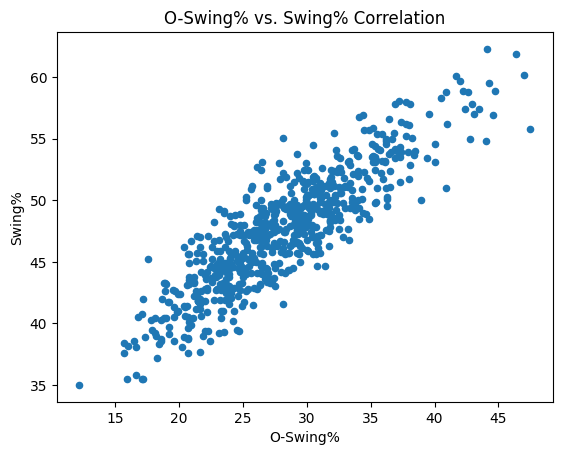

In [469]:
# Build and show scatterplots
df.plot.scatter(x="z_swing_percent",y="swing_percent")
plt.xlabel("Z-Swing%")
plt.ylabel("Swing%")
plt.title("Z-Swing% vs. Swing% Correlation")

df.plot.scatter(x="oz_swing_percent", y="swing_percent")
plt.xlabel("O-Swing%")
plt.ylabel("Swing%")
plt.title("O-Swing% vs. Swing% Correlation")

Both Z-Swing% and O-Swing% share very strong, positive correlations with Swing%. The first two attributes are specific, holding unique relationships with other statistics in the dataset. However, Swing% is a rough average of the two, meandering in the middle and adding no further value to the dataset for analysis purposes. This very strong linear dependence implies it is a redundant feature that may not be needed for clustering.

Text(0.5, 1.0, 'Z-Contact% vs. K% Correlation')

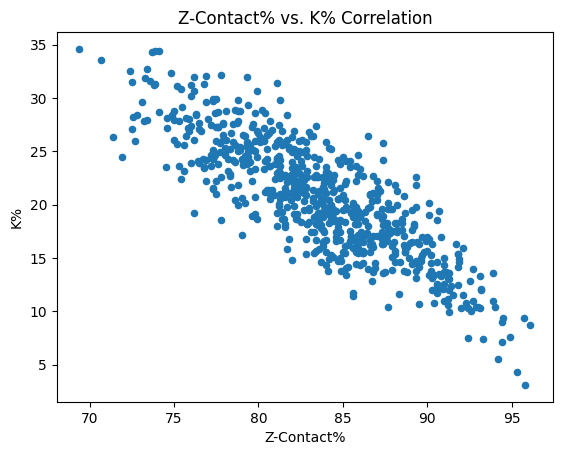

In [485]:
# Build and show scatterplot
df.plot.scatter(x="iz_contact_percent", y="k_percent")
plt.xlabel("Z-Contact%")
plt.ylabel("K%")
plt.title("Z-Contact% vs. K% Correlation")

Batters who make more frequent bat-to-ball contact in the strike zone, whether fouling pitches off or putting them in play, generally strike out less, giving them better chances of reaching base. This correlation forms distinct ranges of players based on performance, allowing for various player groupings in future clustering, such as skilled contact hitters versus those who struggle to make contact, which affects strikeout rates differently.

Text(0.5, 1.0, 'O-Swing% vs. BB% Correlation')

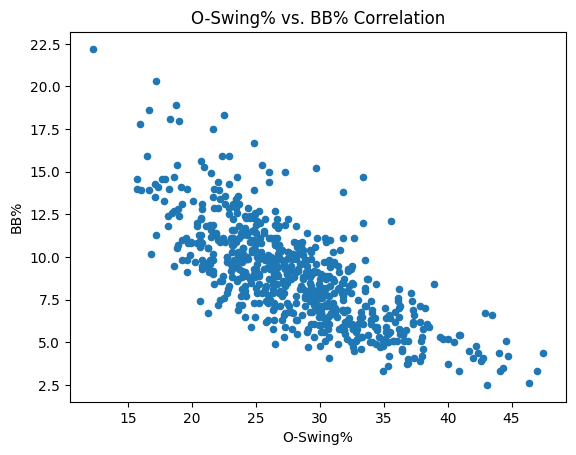

In [500]:
# Build and show scatterplot
df.plot.scatter(x="oz_swing_percent", y="bb_percent")
plt.xlabel("O-Swing%")
plt.ylabel("BB%")
plt.title("O-Swing% vs. BB% Correlation")

The relation between O-Swing% and BB% shows that, typically, the more a batter swings outside the zone, the less they will walk. The scatterplot holds lots of variability in this field, but the correlation is still clear and strong, making for a useful association in clustering to find both aggressive and patient hitters, as well as how their approach affects their walk rates.

Text(0.5, 1.0, 'wOBA vs. xwOBA Correlation')

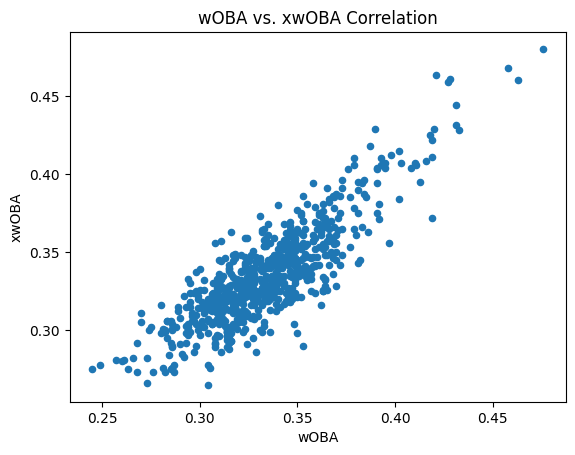

In [514]:
# Build and show scatterplot
df.plot.scatter(x="woba", y="xwoba")
plt.xlabel("wOBA")
plt.ylabel("xwOBA")
plt.title("wOBA vs. xwOBA Correlation")

Many players fall in line with what is expected from their underlying statistics, but many also fall short or exceed their expected results. These differences will be crucial to measure, as they can help determine if any player profile clusters naturally lend themselves to more of these outliers than others, because many of them exist. Different batting approaches may hold stronger or weaker correlations with these differences, which will need to be analyzed after clustering.

Text(0.5, 1.0, 'K% vs. wOBA Correlation')

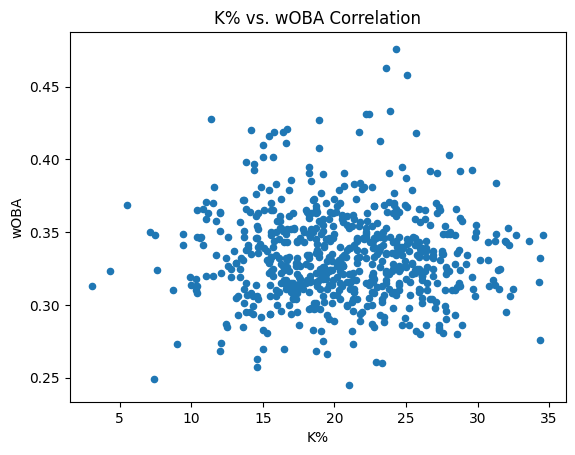

In [527]:
# Build and show scatterplot
df.plot.scatter(x="k_percent", y="woba")
plt.xlabel("K%")
plt.ylabel("wOBA")
plt.title("K% vs. wOBA Correlation")

The relationship between K% and wOBA is interesting to examine because it is intuitive to believe that a lower K% would lead to a higher weighted on-base average. However, as the scatterplot reveals, the lowest K% values do not exactly produce the higher wOBA's. Players can perform poorly with a low K%. Conversely, players can perform exceptionally with a high K%. The plot demonstrates that there are multiple paths to effectively getting on base at the major league level, and the need for additional attributes to showcase these other strategies and subsequent clusters.

## Impact

The performed bivariate and multivariate analyses demonstrate many key relationships within the dataset as well as the need for them, as some anticipated correlations are not as insightful as others. The need for a diverse set of features for the upcoming data mining phase is vital and will be settled upon next.

# Feature Engineering & Selection

The following creation and selection of attributes to be used in the data mining process and their subsequent evaluation are based upon the previous univariate, bivariate, and multivariate analysis.

## Feature Engineering

In [ ]:
# Create and summarize new dataset feature, representing difference between wOBA and xwOBA
df["perf_diff"] = df["woba"] - df["xwoba"]
df["perf_diff"].describe()

count    669.000000
mean      -0.001484
std        0.017406
min       -0.048000
25%       -0.013000
50%       -0.002000
75%        0.010000
max        0.063000
Name: perf_diff, dtype: float64

I created a statistic to measure the difference between a player's expected weighted on-base average and their actual weighted on-base average to make it easier to view strictly whether a player matched their expected performance, without considering how well of a performance they actually recorded. The key is whether the player was under or over this expectation. If they were under, their performance difference would be negative, while it would be positive if they exceeded what was expected from them. The more positive or negative the value, the more strongly they overperformed or underperformed. After the clustering phase, this characteristic will be used as an evaluative attribute, comparing which clusters tend to overachieve, underachieve, or roughly match their expectations, providing answers to the related discovery question proposed.

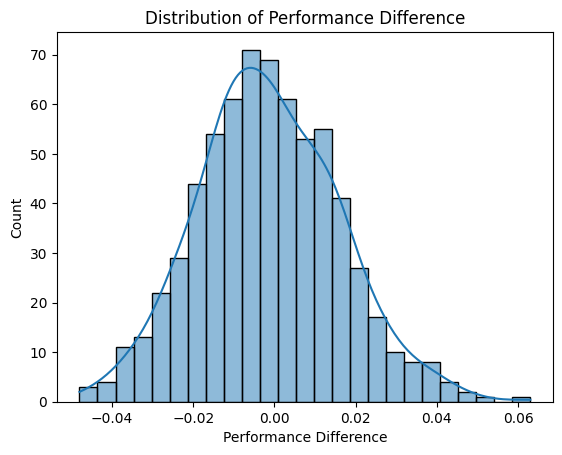

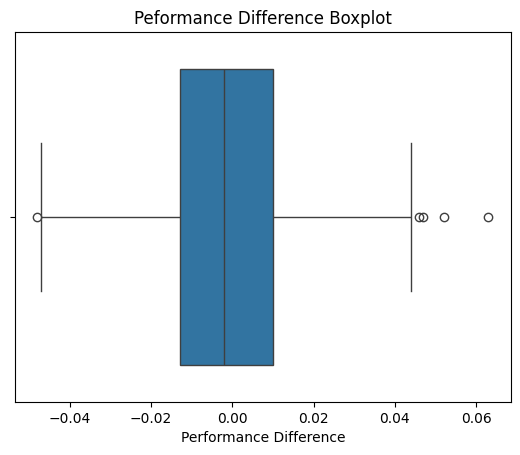

In [539]:
# Build and show histogram
sns.histplot(df["perf_diff"], bins = 25, kde = True)
plt.title("Distribution of Performance Difference")
plt.xlabel("Performance Difference")
plt.show()

# Build and show boxplot
sns.boxplot(x = df["perf_diff"])
plt.xlabel("Performance Difference")
plt.title("Peformance Difference Boxplot")
plt.show()

The distribution for the performance difference metric is unimodal but holds lots of variability, which gives cluster groupings the potential to be more concentrated in various ranges of the statistic. More outliers appear on the upper end of the spectrum, but more values fall on the lower half, accentuating this variety. Performance difference will be used to interpret clusters and locate outliers, so this variety serves to show the many different outcomes that exist.

## Feature Selection

There will be two sets of features chosen for the data mining stage. The first will be used for clustering, sorting player performance observations into distinct groups based on data describing their plate approach. The second set will be used for the post-clustering phase, including anomaly detection and comprehensive evaluations.

### Clustering Features

- Z-Swing%
- Z-Contact%
- O-Swing%
- O-Contact%
- BB%
- K%

These features measure the critical decisions batters take when at the plate, and what type of approach forms from those decisions. The metrics covering in-zone pitches reveal if a player is aggressive or passive in that area, and if the pitches they choose to swing at were intelligent decisions. The out-of-zone pitch statistics are similar. BB% and K%, on the other hand, are more widespread, giving a broader look into a player's characteristics and judging, in general, what kind of batter they are. Additionally, the Swing% metric was omitted because it was redundant, already covered by the Z-Swing% and O-Swing% measurements, as covered during the bivariate analysis. Swing% landed in the middle of these two attributes, acting as a median, not providing any additional value. These determinations leave a strong set of six features for cluster formation.

### Post-Clustering Features

- wOBA
- xwOBA
- Performance Difference

These metrics cover the outcomes of players, helping to interpret each formed cluster and its tendencies from a production standpoint. wOBA and xwOBA describe a player's pure on-base skill. Did they perform well or subpar? Did they exceed what was expected from them based on their underlying statistics or fall short of them? The performance difference measurement represents the disparity between these two features, focusing on the extent to which a player landed over or under their expectations without factoring in the actual quality of their performance itself. In this category, achieving a wOBA and xwOBA of 0.245 and 0.235, respectively, is equivalent to having those metrics valued at 0.392 and 0.382, respectively. In total, these characteristics can reveal patterns across the clusters, detect performance outliers, and provide insight into the advantages and disadvantages of each plate approach strategy as a result.

## Clustering Preparation

In [ ]:
# Create and display data table for clustering holding only the chosen clustering features
clustering_features = ["z_swing_percent", "oz_swing_percent", "iz_contact_percent", "oz_contact_percent", "bb_percent", "k_percent"]
clustering_table = df[clustering_features]
print(clustering_table)

     z_swing_percent  oz_swing_percent  iz_contact_percent  \
0               69.1              30.2                82.0   
1               73.8              31.0                77.3   
2               66.3              27.4                86.8   
3               67.9              26.2                85.8   
4               63.7              19.1                81.1   
..               ...               ...                 ...   
664             61.3              24.6                91.3   
665             68.3              22.3                81.6   
666             52.8              22.4                91.0   
667             66.6              32.1                92.4   
668             64.5              22.5                91.5   

     oz_contact_percent  bb_percent  k_percent  
0                  57.1         7.6       22.4  
1                  52.6         8.7       21.6  
2                  59.9         8.6       17.1  
3                  63.9         9.3       15.6  
4         

The critical dimensions of the batter plate approach are represented by the table, created with minimal redundancy, and will be the input for clustering. Because the planned clustering algorithms are distance-based and sensitive to feature scaling, these selected attributes will be standardized next before any algorithms are implemented on them.

# Data Transformation

Data transformation will be performed through standardization, because even though the values to be used for clustering lie between 0 and 1 when converting percentages to decimals, their spreads are different within this range. For example, K% ranges from 3%-34%, while Z-Swing% stays between 52%-83%. Utilizing standardization instead of simple min-max scaling will retain variability and outlier handling. All attributes will be centered at zero, allowing dispersions to become more comparable and distances to be kept proportional for clustering.

In [541]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_features = scaler.fit_transform(clustering_table)
standardized_table = pd.DataFrame(standardized_features, columns=clustering_features, index=clustering_table.index)
standardized_table.describe()

,z_swing_percent,oz_swing_percent,iz_contact_percent,oz_contact_percent,bb_percent,k_percent
count,6.690000e+02,6.690000e+02,6.690000e+02,6.690000e+02,6.690000e+02,6.690000e+02
mean,-2.527790e-15,3.186290e-16,-2.060468e-15,-1.593145e-16,1.354173e-16,9.027823e-17
std,1.000748e+00,1.000748e+00,1.000748e+00,1.000748e+00,1.000748e+00,1.000748e+00
min,-2.620102e+00,-2.750894e+00,-2.849082e+00,-2.491898e+00,-2.199073e+00,-3.244026e+00
25%,-6.903674e-01,-7.217870e-01,-6.940491e-01,-7.435926e-01,-7.218122e-01,-7.225237e-01
50%,-4.127467e-02,-9.744630e-02,1.086804e-02,1.654015e-02,-3.471436e-02,-1.798619e-02
75%,6.604472e-01,6.136084e-01,6.755042e-01,5.920692e-01,6.180286e-01,7.236322e-01
max,2.783156e+00,3.371113e+00,2.528429e+00,3.676036e+00,4.568841e+00,2.596219e+00


After standardization, all key attributes hold approximate means of 0 and standard deviations of 1. The distributions maintain relative proportions, which are now easily comparable due to their similar distance ranges, and are ready to be transferred into the clustering phase.

# Clustering

The clustering phase begins by selecting a clustering algorithm. Next, the number of clusters and their corresponding parameters will be decided on. Finally, the clusters will be formed, visualized, and interpreted with evaluations and takeaways.

## Algorithm Choice

I have chosen the K-Means clustering algorithm to be applied to my dataset because the data is continuous and standardized, represented by normal distributions. The algorithm will provide clear, compact, and spherical cluster centers, representing meaningful batter archetypes, that will be easily interpretable for analysis. The process of choosing k, the number of clusters, and its related parameters will be completed next.

## K-Means Parameters

The key parameter in K-Means is k, or the number of clusters to find in the dataset. To find this value, the elbow method will be employed and subsequently validated by finding the connected silhouette score. The other K-Means input values, such as n_init and max_iter, will have different values experimented on, except the variable init, which will always be k-means++.

### Elbow Method

The elbow method plots the number of clusters made from a dataset with the amount of in-cluster variation within them. Identifying the point at which this variation begins to slow down more quickly yields the likely ideal cluster amount. It is not worth keeping more clusters than this found number due to diminishing returns, causing there to be minimal added value for each cluster included past this point, resulting in confusion and a lack of clarity.

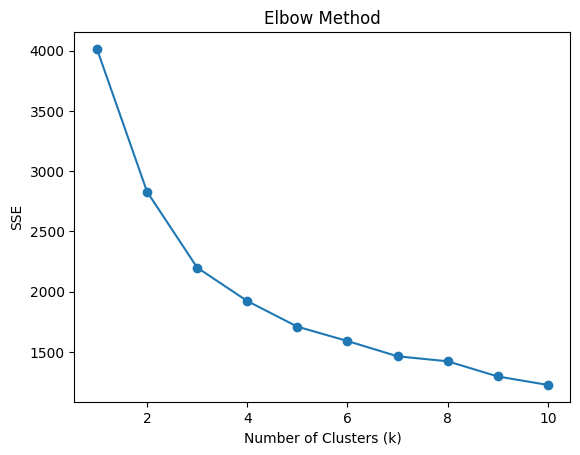

In [542]:
from sklearn.cluster import KMeans
sse_values = []
for k in range(1, 11):
    km = KMeans(n_clusters=k)
    km.fit(standardized_table)
    sse_values.append(km.inertia_)

plt.figure()
plt.plot(range(1, 11), sse_values, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("SSE")
plt.title("Elbow Method")
plt.show()

The elbow of the graph appears to be located at k = 3, where the minimization of the sum of squares within clusters dramatically slows down compared to each other point. This takeaway will be compared against the silhouette scores computed for each potential cluster allocation to validate that this is the correct number of clusters to allot.

### Silhouette Score

Because the elbow method is partly subjective, the silhouette scores of each cluster allocation will be measured to ensure its validity. These measurements will fall on a range of -1 to 1, with the more positive value indicating a stronger cluster formation based on how well each data point fits in its given cluster when compared to other clusters and vice versa.

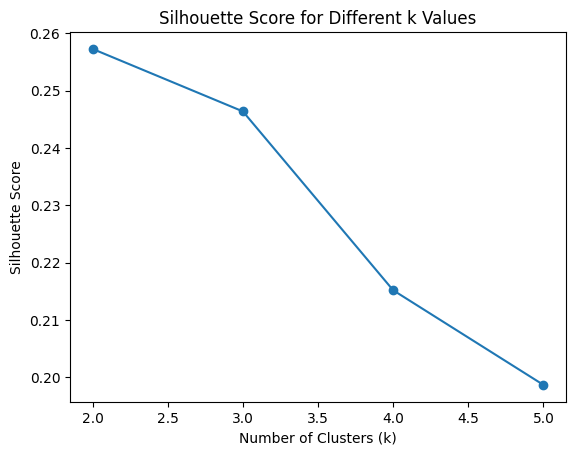

In [543]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(standardized_table)
    score = silhouette_score(standardized_table, labels)
    silhouette_scores.append(score)

plt.figure()
plt.plot(range(2, 6), silhouette_scores, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different k Values")
plt.show()

The silhouette scores for k values 2-5 were calculated, as this was the only range of competing cluster amounts based on the elbow method graph. From the silhouette score graph, k values 2 and 3 are the strongest, while values 4, 5, and larger are obviously weaker, so they can be discarded. Two formed clusters yield a silhouette score of nearly 0.26, while three assembled clusters produce a score of nearly 0.25. A discrepancy of roughly 0.01 differentiates the two, making k = 2 the technically stronger option for cluster composition.

### Final Decision

After analyzing the results of the elbow method and silhouette score outputs, a value of k = 3 has been decided to use for K-Means Clustering. The elbow method visibly points to k = 3, and while the silhouette score for k = 2 is slightly stronger, the difference is not very substantive, so k = 3 will be kept to retain richer and more diverse groups for understanding. Furthermore, a k value of two clusters would simplify the dataset significantly, relinquishing its intricacies and losing its key attributes. The choice of three clusters, on the other hand, provides an ample template for analytical, evaluative, and interpretative purposes.

## Clustering Visualization & Interpretation

Now that the clustering algorithm choice has been decided on as well as the number of clusters to form, K-Means Clustering will now be performed.

### Cluster Creation & Descriptions

In [544]:
# K-Means implementation
kmeans = KMeans(n_clusters=3, init="k-means++", n_init=10, random_state=42)
kmeans.fit(standardized_table)

# K-Means outputs
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Insert cluster labels back into original dataframe
df["Cluster"] = labels
df["Cluster"] = df["Cluster"] + 1
df.head()


,"last_name, first_name",player_id,year,k_percent,bb_percent,woba,xwoba,z_swing_percent,oz_swing_percent,oz_contact_percent,iz_contact_percent,swing_percent,perf_diff,Cluster
0,"Cabrera, Miguel",408234,2021,22.4,7.6,0.305,0.313,69.1,30.2,57.1,82.0,49.4,-0.008,2
1,"Cruz, Nelson",443558,2021,21.6,8.7,0.346,0.367,73.8,31.0,52.6,77.3,51.0,-0.021,2
2,"Peralta, David",444482,2021,17.1,8.6,0.314,0.294,66.3,27.4,59.9,86.8,46.5,0.020,3
3,"Blackmon, Charlie",453568,2021,15.6,9.3,0.333,0.358,67.9,26.2,63.9,85.8,47.3,-0.025,3
4,"McCutchen, Andrew",457705,2021,23.0,14.1,0.335,0.340,63.7,19.1,50.5,81.1,41.7,-0.005,1


K-Means has been implemented and each player in the original dataset has now been assigned a label from 1-3, denoting their cluster assignment.

In [545]:
df["Cluster"].value_counts()

Cluster
2    251
3    222
1    196
Name: count, dtype: int64

The assortment of players in each cluster is slightly unbalanced, with cluster 2 holding the most, 1 holding the least, and 3 being very close to the mean between the two. This may mean that cluster 1 has more differentiated numbers because it holds less of a sample size compared to the other clusters, while cluster 2 could be much more centralized due to its high population.

In [546]:
df.groupby("Cluster")[clustering_features].std()

,z_swing_percent,oz_swing_percent,iz_contact_percent,oz_contact_percent,bb_percent,k_percent
Cluster,,,,,,
1,4.534517,3.226161,4.144895,6.588246,2.467614,4.293231
2,4.410413,4.638762,3.636298,6.477642,2.006616,3.854613
3,4.806864,4.538857,3.170463,6.305298,2.141786,3.348051


In [547]:
# Show means of key values in each cluster
df.groupby("Cluster")[clustering_features].mean()

,z_swing_percent,oz_swing_percent,iz_contact_percent,oz_contact_percent,bb_percent,k_percent
Cluster,,,,,,
1,64.857143,23.026531,80.964286,53.527551,11.766327,23.691837
2,72.123904,32.614343,81.331873,54.031474,7.126295,22.937849
3,65.314414,27.360360,88.328829,67.784685,8.377928,15.218018


Each cluster displays key differences in plate approach statistics, uncovering distinct batter archetypes.

Cluster 3 undoubtedly belongs to contact hitters, evidently holding the highest contact rates of the clusters. Their in-zone rate is 7% higher than the closest cluster, and their out-of-zone rate at 13%, also sporting the lowest strikeout rate among the clusters. This group's swing percentages and walk rate fall in the middle of the other clusters, suggesting their utility lies mainly in their contact ability despite their average approach to the plate in other areas.

Cluster 1 appears to belong to selective batters, as their swing percentages are the lowest among the three clusters, and their walk rate is the highest by 3%. This takeaway is also apparent by their contact percentages being the lowest as well. These batters are patient, who wait for their pitch, resulting in high walk rates when pitchers are missing the zone often, but also high strikeout rates when pitchers are hitting their mark. 

Cluster 2 belongs to the most free-swinging of batters, suggested by their high swing rates. Their contact rates are average, as can be expected with frequent swings, and their walk rate is the lowest as a result. While they strikeout less than selective batters, by a difference of less than 1%, they still strikeout significantly, nearly 8% more than contact hitters, due to their swinging nature.

In [548]:
outcome_features = ["woba", "xwoba", "perf_diff"]
df.groupby("Cluster")[outcome_features].mean()

,woba,xwoba,perf_diff
Cluster,,,
1,0.343378,0.348546,-0.005168
2,0.330116,0.331546,-0.001430
3,0.329851,0.328144,0.001707


When it comes to the average performance outcomes of the three clusters, cluster 1 stands out. Clusters 2 and 3 are very similar, but the selective batters of cluster 1 get on base noticeably more, with a 0.012, or 1.2%, edge on cluster 2, and their expected statistics are actually better, even despite owning the highest mean strikeout rate. This makes it clear that patience gives a hitter slightly better odds at getting on base, helped by good walk rates and careful pitch selection. Clusters 2 and 3 perform very closely to what is expected from them, but cluster 1 has the greatest underperforming difference at 0.5%, further cementing its edge over the other batter profiles.

### Cluster Visualization